In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [2]:
# define range of distances
dist_universe = np.linspace(0, 1, 100) # units in metres
speed_universe = np.linspace(-10,10,100) # units in metres/second

# define inputs 
dist_obs = ctrl.Antecedent(dist_universe, 'dist_from_obstacle')
dist_near = ctrl.Antecedent(dist_universe, 'dist_from_nearest_neighbour')

# define output
delta_speed = ctrl.Consequent(speed_universe, 'change_in_speed')

In [5]:
# membership naming
names = ['nb', 'ns', 'ze', 'ps', 'pb']

# input membership functions
dist_obs.automf(5, names=names)
dist_near.automf(5, names=names)

# output membership functions
delta_speed.automf(5, names=names)

C:\Users\LandT\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


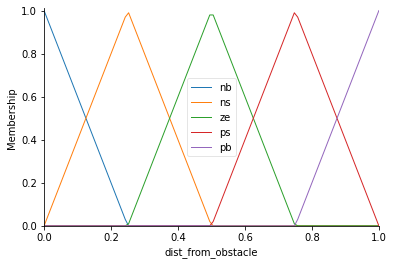

In [6]:
dist_obs.view()

In [7]:
# define fuzzy rules
rule0 = ctrl.Rule(# great decel
        antecedent=(
                (dist_obs[''] & dist_near['']) | 
                (dist_obs[''] & dist_near[''])),
        consequent=delta_speed['nb'], 
        label='rule nb')

rule1 = ctrl.Rule(# slight decel
        antecedent=(
                (dist_obs[''] & dist_near['']) | 
                (dist_obs[''] & dist_near[''])),
        consequent=delta_speed['nb'], 
        label='rule ns')

rule2 = ctrl.Rule(# continue on path
        antecedent=(
                (dist_obs['ze'] & dist_near['ze']) | 
                (dist_obs['ze'] & dist_near['ze'])),
        consequent=delta_speed['ze'], 
        label='rule ze')

rule3 = ctrl.Rule(# slight accel
        antecedent=(
                (dist_obs[''] & dist_near['']) | 
                (dist_obs[''] & dist_near[''])),
        consequent=delta_speed['ps'], 
        label='rule ps')

rule4 = ctrl.Rule(# great accel
        antecedent=(
                (dist_obs[''] & dist_near['']) | 
                (dist_obs[''] & dist_near[''])),
        consequent=delta_speed['pb'], 
        label='rule pb')

IndentationError: unexpected indent (Temp/ipykernel_5876/1213107462.py, line 6)